In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [2]:
wiki_path = os.path.join(os.getcwd(),"data","imdb","wiki")

In [3]:
file_names=[]
file_contents=[]
for each_file in os.listdir(wiki_path):
    lines = open(os.path.join(wiki_path,each_file)).readlines()
    to_append=[]
    for each_line in lines:
        to_append.append(each_line.replace("\\n",""))
    file_names.append(each_file)
    file_contents.append(" ".join(to_append))

In [10]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(file_contents)

In [11]:
print(vectorizer.get_feature_names())
print(X.shape)

ἀγήσανδρος', 'ἀγίου', 'ἀγαθός', 'ἀγαπάω', 'ἀγεσίλαος', 'ἀγοράσαι', 'ἀδάμας', 'ἀδελφέ', 'ἀειφανής', 'ἀθάνατος', 'ἀθίγγανος', 'ἀισμάτων', 'ἀκίδων', 'ἀκηδία', 'ἀμαζόνας', 'ἀμαζόνιος', 'ἀμαζόνος', 'ἀμαζόνων', 'ἀμβροσία', 'ἀμὴν', 'ἀνάνδρους', 'ἀνήρ', 'ἀναία', 'ἀναγεγεννημένοι', 'ἀναγιγνωσκόμενα', 'ἀναστασίας', 'ἀναστασιακόν', 'ἀνδρεία', 'ἀνδροκτόνα', 'ἀνδροκτόνες', 'ἀνδρολέτειρα', 'ἀνδρολέτειραι', 'ἀνδροφόνους', 'ἀνεξέταστος', 'ἀνθήλη', 'ἀνθεστήρια', 'ἀνθρώπου', 'ἀνθρώπῳ', 'ἀνταρκτική', 'ἀνταρκτικός', 'ἀντιάνειρα', 'ἀντιάνειραι', 'ἀντιόπη', 'ἀξίαν', 'ἀπίστων', 'ἀπαίτησις', 'ἀποκτεννόντων', 'ἀποκτεῖναι', 'ἀπολέσαι', 'ἀποτρεπτικός', 'ἀπὸ', 'ἀρά', 'ἀρή', 'ἀργυρᾶν', 'ἀρετή', 'ἀριάνης', 'ἀριθμὸν', 'ἀριθμὸς', 'ἀριστοκρατία', 'ἀρκούδας', 'ἀρκτικός', 'ἀστρατείας', 'ἀτ', 'ἀτλαντικῷ', 'ἀτλαντὶς', 'ἀφροδίτη', 'ἀφροδῑ', 'ἀψίνθιον', 'ἀϊδωνεύς', 'ἁγία', 'ἁγίας', 'ἁγίου', 'ἁλιάετος', 'ἁμαζακάραν', 'ἁρμονία', 'ἁρμόζω', 'ἁψάμενος', 'ἂν', 'ἄγγελος', 'ἄγει', 'ἄγριος', 'ἄγω', 'ἄκανθα', 'ἄμμος', 'ἄν', 'ἄναια', 

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### `The following block would take a lot of time to run. `

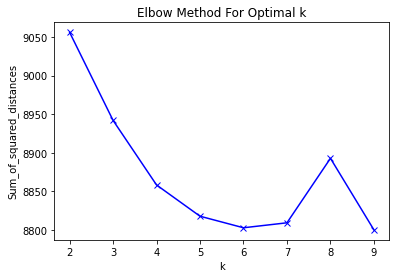

In [25]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10,random_state=32)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We would select K = 5 or K = 6 since it seems promising for our dataset and also the squared distances seem to increase after that.

In [26]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=32)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(file_names,labels)),columns=['file_name','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

      file_name  cluster
7153  tt0005750        0
6891  tt0014357        0
6884  tt0012654        0
6882  tt0002045        0
6879  tt0003973        0
...         ...      ...
5128  tt0010023        5
3504  tt0004243        5
5120  tt0006965        5
9939  tt0010400        5
8143  tt0004747        5

[14307 rows x 2 columns]


In [27]:
wiki_cl["cluster"].value_counts()

0    4062
4    3764
3    3743
2    2525
5     184
1      29
Name: cluster, dtype: int64

In [30]:
wiki_cl.to_csv(os.path.join(os.getcwd(),"data","imdb","wiki_clusters.csv"))

#### `The following block would take a lot of time to run.`

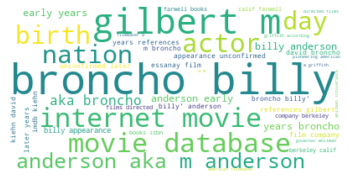

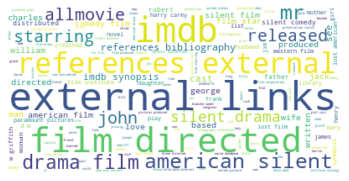

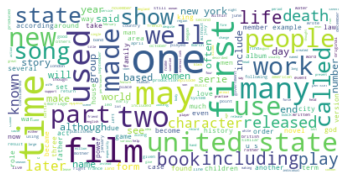

In [31]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':file_contents}
result=pd.DataFrame(result)
cluster_file_path = os.path.join(os.getcwd(),"cluster_images")
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=500, background_color="white").generate(text)
    # print('Cluster: {}'.format(k))
    # print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['file_name']
    # print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    wordcloud.to_file(os.path.join(os.getcwd(),"cluster_images",str(k)) + ".png")
    # plt.imsave(file_name,wordcloud)
    plt.axis("off")
    plt.show()